In [64]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.distributions as td

In [6]:
batch = 12
classes = 2
patch_width = 16
patch_size = (patch_width, patch_width)
mean = torch.randn(batch, classes, 224, 160)

In [7]:
cov_factor = torch.randn(batch, classes * patch_width, 224, 160)
cov_diag = torch.randn(batch, classes, 224, 160).exp() + 1e-8

In [8]:
# now I want to split this into a patch by patch representation...
224*160 / (16*16)

140.0

In [109]:
blocks = [torch.ones((32, 32)) * i for i in range(224*160 // (32*32))]

In [110]:
grid = torch.stack(blocks).unsqueeze(0)

In [111]:
grid = grid.flatten(2,3)
grid = grid.swapaxes(1,2)

In [112]:
folded = torch.nn.functional.fold(grid, (224, 160), (32,32), stride=32)

In [113]:
folded.shape

torch.Size([1, 1, 224, 160])

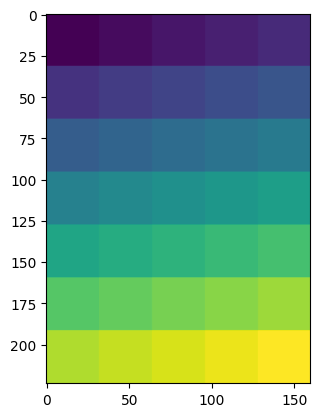

In [114]:
plt.imshow(folded[0,0])

In [115]:
uf = folded.reshape((1, 1, 35, 32, 32))#unfold(dimension=-1,size=32,step=32)

In [116]:
grid.shape

torch.Size([1, 1024, 35])

In [107]:
folded = torch.nn.functional.fold(uf, (224, 160), (32,32), stride=32)

RuntimeError: Expected 2D or 3D (batch mode) tensor for input with possibly 0 batch size and non-zero dimensions for input, but got: [1, 1, 35, 32, 32]

In [98]:
uf.shape

torch.Size([1, 1, 224, 5, 1, 32])